### Sales Analysis Using Pandas For a Super Store

    1.Import important libraries

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

    2.Import the Dataset

In [90]:
df = pd.read_excel('superstore_sales.xlsx')

In [91]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


    3.Data Cleaning
        I.Identify the NAN row
            II.Drop the NAN row

In [92]:
#I
#now let's check for missing value
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [93]:
#I
nan_df = df[df.isna().any(axis=1)]
nan_df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year


    II.Drop the NAN rows

In [94]:
df = df.dropna(how='all')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


    4.Examining the datasets

In [95]:
#To identify the shape of the dataset
df.shape

(51290, 21)

In [96]:
#To identify all the columns in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [97]:
##To get a brief survey of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [98]:
#To get the descriptive statistics 
df.describe()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
std,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931
min,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000


# EXPLORATORY DATA ANALYSIS

<H4> FINDING 1. WHAT IS THE OVERALL SALES TREND

TASK 1: LET'S CHECK FOR THE MIN. AND MAX DATE TREND

In [99]:
# For Min. Date Trend. 
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [100]:
 df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

##### THE ABOVE SHOWS THAT THE DATASET IS FROM 1ST JANUARY, 2011 TO 31ST DECEMBER, 2014

TASK 2: Let's get the month and year from the dataset

    A.Load the dataset

In [101]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


    B.Using Groupby To group the month and year together 

In [102]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [103]:
df.groupby('month_year').sum()

,sales,quantity,discount,profit,shipping_cost,year
month_year,,,,,,
2011-01,98898.48886,1463,68.758,8321.80096,10544.78800,870763
2011-02,91152.15698,1224,52.252,12417.90698,10681.16300,760158
2011-03,145729.36736,1836,74.212,15303.56826,13096.18550,1083929
2011-04,116915.76418,2020,80.782,12902.32438,12954.52000,1134204
2011-05,146747.83610,2013,82.382,12183.82870,16443.20600,1138226
2011-06,215207.38022,3112,159.534,23415.24702,23813.10900,1844087
2011-07,115510.41912,1774,80.086,5585.00352,11844.47600,995445
2011-08,207581.49122,3035,121.462,23713.66772,22001.13600,1765658
2011-09,290214.45534,3707,137.678,35776.88394,29664.85100,2115572


    C.Now to restrict the dataset to only month-year and sales

In [104]:
df.groupby('month_year').sum()['sales'].reset_index()

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


    D.grouping month-year

In [105]:
df_trend = df.groupby('month_year').sum()['sales'].reset_index()

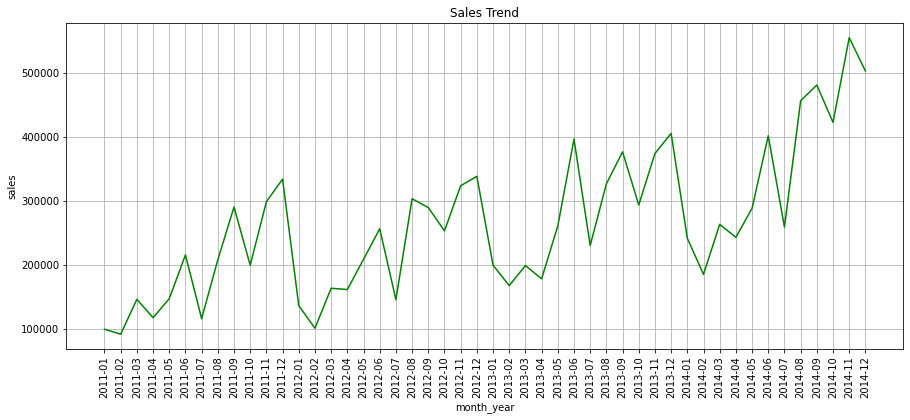

In [134]:
plt.figure(figsize=(15,6))
plt.plot(df_trend['month_year'], df_trend['sales'], color='green')
plt.xlabel('month_year')  #X-axis label
plt.ylabel('sales') #Y-axis label 
plt.title("Sales Trend") #Chart title
plt.xticks(rotation ='vertical', size=10)
plt.grid()
plt.show()

###### DEDUCTION: THERE'S A PATTERN OF LOW SALES IN 1ST AND 2ND MONTH OF EVERY YEAR, AND AN ALL TIME HIGH SALES AT THE LAST QUARTER OF EACH YEAR

- <H5>FINDING 2: WHICH ARE TOP 5 PRODUCTS BY SALES 

1. load the dataset

In [107]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


Now to get a clearer perspective we need to group the product and sales columns together by creating a dataframe for the grouping

In [108]:
df.groupby('product_name').sum()['sales']

product_name
"While you Were Out" Message Book, One Form per Page                                                     25.228
#10 Gummed Flap White Envelopes, 100/Box                                                                 41.300
#10 Self-Seal White Envelopes                                                                           108.682
#10 White Business Envelopes,4 1/8 x 9 1/2                                                              488.904
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                 286.672
                                                                                                         ...   
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4     477.660
iOttie HLCRIO102 Car Mount                                                                              215.892
iOttie XL Car Mount                                                                        

In [109]:
pd.DataFrame(df.groupby('product_name').sum()['sales'])

,sales
product_name,
"""While you Were Out"" Message Book, One Form per Page",25.228
"#10 Gummed Flap White Envelopes, 100/Box",41.300
#10 Self-Seal White Envelopes,108.682
"#10 White Business Envelopes,4 1/8 x 9 1/2",488.904
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",286.672
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",477.660
iOttie HLCRIO102 Car Mount,215.892
iOttie XL Car Mount,223.888


Now, let's sorts the product sales to highlights the TOP 5 sales by products

    Task 1.Sort the product_name column

In [110]:
product_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])

In [111]:
product_sales = product_sales.sort_values('sales', ascending=False)
product_sales.head(5)

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240


DEDUCTION: THESE ARE THE TOP 5 SALES BY PRODUCT

- <h4>FINDINGS 3: THE MOST SELLING PRODUCTS

    TASK 1:To get to this, we group the product_name and quantity together

In [112]:
df.groupby('product_name').sum()['quantity']

product_name
"While you Were Out" Message Book, One Form per Page                                                    8
#10 Gummed Flap White Envelopes, 100/Box                                                               11
#10 Self-Seal White Envelopes                                                                          10
#10 White Business Envelopes,4 1/8 x 9 1/2                                                             32
#10- 4 1/8" x 9 1/2" Recycled Envelopes                                                                37
                                                                                                       ..
iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4    24
iOttie HLCRIO102 Car Mount                                                                             12
iOttie XL Car Mount                                                                                    14
invisibleSHIELD by ZAGG Smudge-Fr

    TASK 2:create a dataframe

In [113]:
pd.DataFrame(df.groupby('product_name').sum()['quantity'])

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24
iOttie HLCRIO102 Car Mount,12
iOttie XL Car Mount,14


TASK 3: Grouping product_name

In [114]:
most_sales = pd.DataFrame(df.groupby('product_name').sum()['quantity'])

Sorting most sales product in descending order

In [115]:
most_sales.sort_values('quantity', ascending=False)

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
...,...
Penpower WorldCard Pro Card Scanner,1
"Bush Saratoga Collection 5-Shelf Bookcase, Hanover Cherry, *Special Order",1
Boston 1900 Electric Pencil Sharpener,1


In [116]:
most_sales = most_sales.sort_values('quantity', ascending=False)

In [117]:
most_sales.head(10)

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


-<h4> FINDINGS 4: WHAT'S THE MOST PREFERRED SHIPPING METHOD BY THE CUSTOMER 

In [118]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year,month_year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011,2011-01
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011,2011-01
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011,2011-01
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011,2011-01
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011,2011-01


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


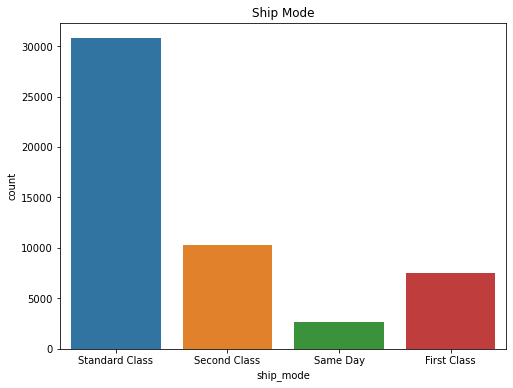

In [155]:
import seaborn as sns
plt.figure(figsize=(8,6.0))
plt.xlabel('Ship_Mode')  #X-axis label
plt.ylabel('count') #Y-axis label 
plt.title("Ship Mode") #Chart title
sns.countplot(df['ship_mode'])
plt.show()

DEDUCTION: THE "STANDARD CLASS" IS THE MOST PREFERRED MODE OF SHIPMENT

-<H4> FINDINGS 5: WHAT ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY

In [120]:
pd.DataFrame(df.groupby('product_name').sum()['quantity'])

,quantity
product_name,
"""While you Were Out"" Message Book, One Form per Page",8
"#10 Gummed Flap White Envelopes, 100/Box",11
#10 Self-Seal White Envelopes,10
"#10 White Business Envelopes,4 1/8 x 9 1/2",32
"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",37
...,...
"iKross Bluetooth Portable Keyboard + Cell Phone Stand Holder + Brush for Apple iPhone 5S 5C 5, 4S 4",24
iOttie HLCRIO102 Car Mount,12
iOttie XL Car Mount,14


In [121]:
cat_subcat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])

Sorting category, profit in descending order

In [144]:
cat_subcat.sort_values(['category', 'profit'], ascending=False).head()

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940

In [152]:
cat_subcat.sort_values(['sub_category', 'profit'], ascending=True).head(10)

profit
category        sub_category              
Technology      Accessories   129626.30620
Office Supplies Appliances    141680.58940
                Art            57953.91090
                Binders        72449.84600
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
Technology      Copiers       258567.54818
Office Supplies Envelopes      29601.11630
                Fasteners      11525.42410
Furniture       Furnishings    46967.42550

<H4>DEDUCTION:
    <br>MOST PROFITABLE CATEGORY:<br>Technology.
    <h4>MOST PROFITABLE SUB CATEGORY:<br>Copiers.

# THANK YOU